### MACD

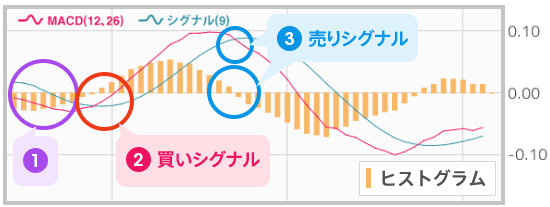

In [1]:
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import yfinance as yf

ticker = "GOOG"
period = "1y"
interval = "1d"
data_df = yf.download(ticker, period=period, interval=interval)
data_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

YF.download() has changed argument auto_adjust default to True



*********************100%***********************]  1 of 1 completed

In [5]:
short_ema = data_df["Close"].ewm(span=12, adjust=False).mean()
long_ema = data_df["Close"].ewm(span=26, adjust=False).mean()

macd = short_ema - long_ema

signal = macd.ewm(span=9, adjust=False).mean()

histogram = macd - signal

data_df["MACD"] = macd
data_df["Signal"] = signal
data_df["Histogram"] = histogram
data_df

,Open,High,Low,Close,Volume,MACD,Signal,Histogram
Date,,,,,,,,
2024-04-12,158.439560,160.937722,157.852345,158.653543,16968200,0.000000,0.000000,0.000000
2024-04-15,155.593048,160.071835,155.413889,159.524424,21140900,0.069472,0.013894,0.055578
2024-04-16,155.264587,156.488785,154.319069,154.906284,15413200,-0.245289,-0.037942,-0.207346
2024-04-17,156.140457,157.932962,155.398959,156.448993,16237800,-0.366036,-0.103561,-0.262475
2024-04-18,156.717712,157.737874,155.473605,156.185231,14016100,-0.477507,-0.178350,-0.299157
...,...,...,...,...,...,...,...,...
2025-04-07,149.240005,154.929993,142.660004,143.389999,47823000,-7.098615,-5.686310,-1.412305
2025-04-08,146.580002,154.440002,145.210007,153.574997,35304400,-6.852930,-5.919634,-0.933296
2025-04-09,161.059998,161.869995,145.809998,146.330002,46479500,-7.160294,-6.167766,-0.992528


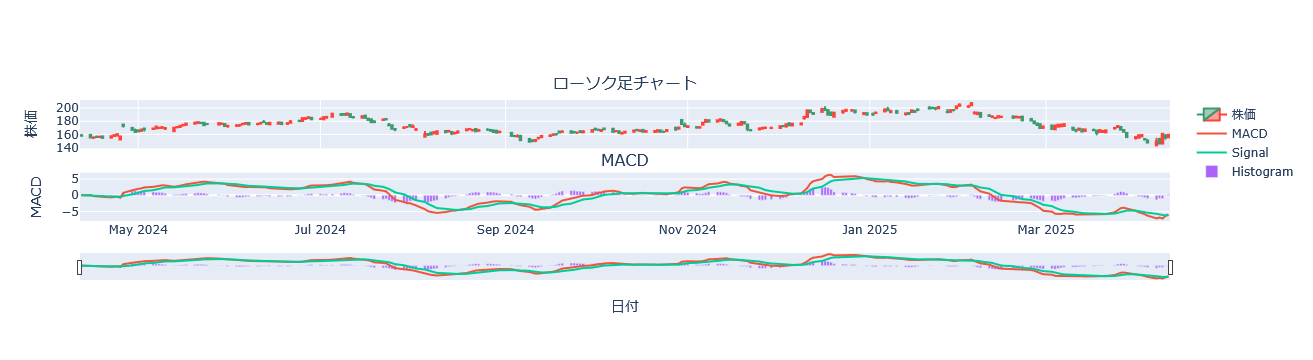

In [12]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True, vertical_spacing=0.2, subplot_titles=("ローソク足チャート","MACD"))

fig.add_trace(go.Candlestick(
        x=data_df.index,
        open = data_df.Open, #["Open"]
        high = data_df.High, #["High"]
        low  = data_df.Low, #["Low"]
        close= data_df.Close,#["Close"]
        name="株価"
    ), row=1,col=1)

fig.add_trace(go.Scatter(x=data_df.index, y=data_df["MACD"], name="MACD", mode="lines"), row=2, col=1)
fig.add_trace(go.Scatter(x=data_df.index, y=data_df["Signal"], name="Signal", mode="lines"), row=2, col=1)
fig.add_trace(go.Bar(x=data_df.index, y=data_df["Histogram"], name="Histogram"), row=2, col=1)

fig.update_layout(
    xaxis_rangeslider_visible=False,
    xaxis2_rangeslider_visible=True,
    xaxis2_title="日付",
    yaxis_title="株価",
    yaxis2_title="MACD"
)

fig.show()        